# Chapter9 数据可视化

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [5]:
data=np.arange(10)

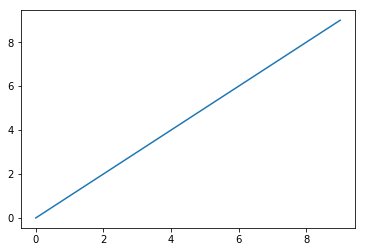

In [6]:
plt.plot(data)

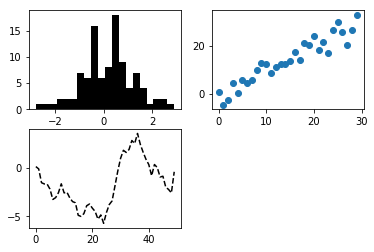

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(),'k--')
ax1.hist(np.random.randn(100),bins=20,color='k')
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

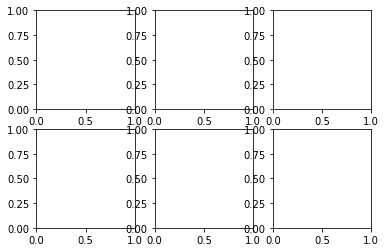

In [19]:
fig,axes=plt.subplots(2,3)

可以对axes进行索引

In [20]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C129DDF60>,
      dtype=object)

### 颜色、标记和线型

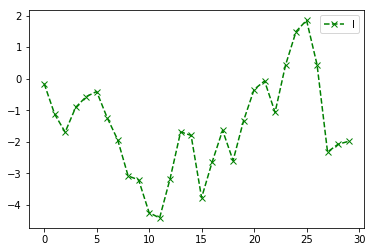

In [27]:
plt.plot(np.random.randn(30).cumsum(),'gx--')
plt.legend('loc')

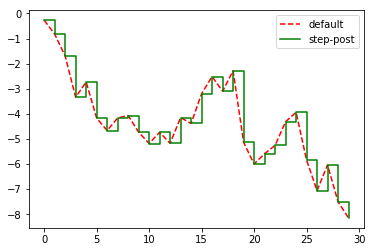

In [29]:
data = np.random.randn(30).cumsum()
plt.plot(data,'r--',label='default')
plt.plot(data,'g-',drawstyle='steps-post',label='step-post')
plt.legend(loc='best')

### 设置标题、轴标签、刻度以及刻度标签

In [30]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [35]:
ax=fig.add_subplot(1,1,1)

In [36]:
ax.plot(np.random.randn(1000).cumsum())

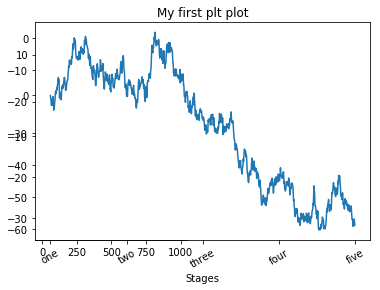

In [52]:
fig

In [46]:
ticks=ax.set_xticks([0,250,500,750,1000])

In [47]:
labels=ax.set_xticklabels(['one','two','three','four','five'],rotation=30)

In [48]:
ax.set_title('My first plt plot')

Text(0.5,1,'My first plt plot')

In [49]:
ax.set_xlabel('Stages')

Text(0.5,17.2,'Stages')

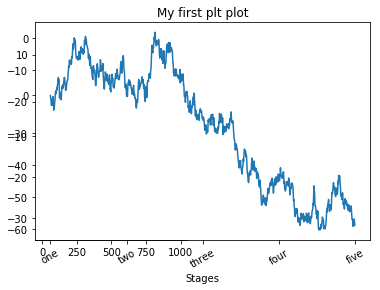

In [50]:
fig

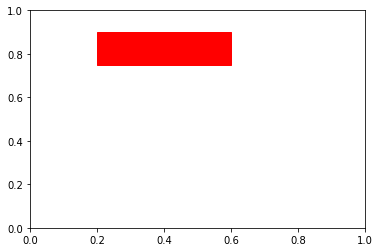

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='r')
ax.add_patch(rect)

In [61]:
#plt.savefig('.svg') 保存图片

In [63]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))

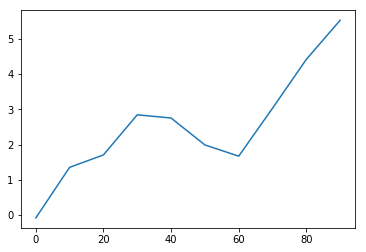

In [64]:
s.plot()

In [72]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['a','b','c','d'],index=np.arange(0,100,10))

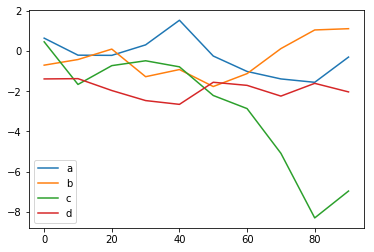

In [73]:
df.plot()

# Chapter10 数据聚合与分组运算

In [74]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
     'key2' : ['one', 'two', 'one', 'two', 'one'],
     'data1' : np.random.randn(5),
     'data2' : np.random.randn(5)})

In [75]:
df

,key1,key2,data1,data2
0,a,one,0.023540,0.429744
1,a,two,-0.555081,0.049978
2,b,one,0.285027,-0.282586
3,b,two,-0.595031,0.236253
4,a,one,1.023167,-0.876282


In [76]:
grouped=df['data1'].groupby(df['key1'])

In [77]:
grouped.mean()

key1
a    0.163875
b   -0.155002
Name: data1, dtype: float64

In [78]:
grouped.size()

key1
a    3
b    2
Name: data1, dtype: int64

In [80]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [81]:
means

key1  key2
a     one     0.523354
      two    -0.555081
b     one     0.285027
      two    -0.595031
Name: data1, dtype: float64

In [82]:
means.unstack()

key2,one,two
key1,,
a,0.523354,-0.555081
b,0.285027,-0.595031


In [83]:
states = np.array(['Ohio', 'California', 'California', 'Ohio','Ohio'])

In [84]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [85]:
df['data1'].groupby([states,years]).mean()

California  2005   -0.555081
            2006    0.285027
Ohio        2005   -0.285745
            2006    1.023167
Name: data1, dtype: float64

In [86]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.163875,-0.132187
b,-0.155002,-0.023167


In [87]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.523354 -0.223269
     two  -0.555081  0.049978
b    one   0.285027 -0.282586
     two  -0.595031  0.236253

### 对分组进行迭代

In [88]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.023540  0.429744
1    a  two -0.555081  0.049978
4    a  one  1.023167 -0.876282
b
  key1 key2     data1     data2
2    b  one  0.285027 -0.282586
3    b  two -0.595031  0.236253


In [90]:
for (key1,key2),group in df.groupby(['key1','key2']):
    print((key1,key2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.023540  0.429744
4    a  one  1.023167 -0.876282
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.555081  0.049978
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.285027 -0.282586
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.595031  0.236253


In [91]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.223269
     two   0.049978
b    one  -0.282586
     two   0.236253

In [92]:
people = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'],index=['Joe', 'Steve', 'Wes', 'Jim','Travis'])

In [93]:
people.iloc[2:3, [1, 2]] = np.nan

In [94]:
people

,a,b,c,d,e
Joe,-1.464564,-0.132338,1.320026,0.180406,-0.227149
Steve,-1.186098,0.398094,1.564618,-1.562035,-0.375078
Wes,0.650879,NaN,NaN,-1.258241,-0.337951
Jim,-0.638505,-0.933578,0.023618,-0.366499,1.062894
Travis,0.193054,0.340605,1.240478,-0.903052,0.882785


In [95]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}

In [101]:
people.groupby(mapping,axis=0)

In [98]:
by_columns=_

In [103]:
by_columns.sum()

,blue,red
Joe,1.500432,-1.824051
Steve,0.002583,-1.163082
Wes,-1.258241,0.312928
Jim,-0.342881,-0.509188
Travis,0.337426,1.416444


In [104]:
by_columns.count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [105]:
map_series=pd.Series(mapping)

In [106]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [110]:
people.groupby(map_series,axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [111]:
people.groupby(len).sum()

,a,b,c,d,e
3,-1.452190,-1.065915,1.343644,-1.444334,0.497794
5,-1.186098,0.398094,1.564618,-1.562035,-0.375078
6,0.193054,0.340605,1.240478,-0.903052,0.882785


### 分位数和桶分析

In [4]:
frame = pd.DataFrame({'data1': np.random.randn(1000),'data2' : np.random.randn(1000)})

In [11]:
quartiles = pd.cut(frame.data1,4)

In [12]:
quartiles.head()

0    (-1.663, -0.0839]
1    (-1.663, -0.0839]
2       (1.495, 3.075]
3     (-0.0839, 1.495]
4     (-0.0839, 1.495]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.249, -1.663] < (-1.663, -0.0839] < (-0.0839, 1.495] < (1.495, 3.075]]

In [13]:
def get_stats(group):
    return {'min' : grouped.min(),'mean' : grouped.mean()}
    

In [14]:
grouped = frame.data2.groupby(quartiles)

In [15]:
get_stats(grouped)

{'min': data1
 (-3.249, -1.663]    -2.148492
 (-1.663, -0.0839]   -3.473056
 (-0.0839, 1.495]    -3.670776
 (1.495, 3.075]      -2.300690
 Name: data2, dtype: float64, 'mean': data1
 (-3.249, -1.663]     0.036249
 (-1.663, -0.0839]    0.015366
 (-0.0839, 1.495]    -0.042694
 (1.495, 3.075]      -0.099482
 Name: data2, dtype: float64}

In [17]:
grouped.apply(get_stats).unstack()

,mean,min
data1,,
"(-3.249, -1.663]","data1 (-3.249, -1.663] 0.036249 (-1.663, -...","data1 (-3.249, -1.663] -2.148492 (-1.663, -..."
"(-1.663, -0.0839]","data1 (-3.249, -1.663] 0.036249 (-1.663, -...","data1 (-3.249, -1.663] -2.148492 (-1.663, -..."
"(-0.0839, 1.495]","data1 (-3.249, -1.663] 0.036249 (-1.663, -...","data1 (-3.249, -1.663] -2.148492 (-1.663, -..."
"(1.495, 3.075]","data1 (-3.249, -1.663] 0.036249 (-1.663, -...","data1 (-3.249, -1.663] -2.148492 (-1.663, -..."


### 示例：用特定于分组的值填充缺失值

In [18]:
s=pd.Series(np.random.randn(6))

In [19]:
s

0   -0.110376
1   -3.019492
2   -1.739491
3    0.297776
4    0.289510
5   -0.530530
dtype: float64

In [20]:
s[::2]=np.nan

In [21]:
s

0         NaN
1   -3.019492
2         NaN
3    0.297776
4         NaN
5   -0.530530
dtype: float64

In [22]:
s.fillna(s.mean())

0   -1.084082
1   -3.019492
2   -1.084082
3    0.297776
4   -1.084082
5   -0.530530
dtype: float64

### 分组平均值填充

In [24]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']

In [25]:
group_key = ['East'] * 4 + ['West'] * 4

In [29]:
data = pd.Series(np.random.randn(8),index=states)

In [30]:
data

Ohio         -0.409221
New York     -0.901118
Vermont       0.897714
Florida       0.556744
Oregon        1.921543
Nevada       -0.363104
California   -0.723725
Idaho         0.908462
dtype: float64

In [31]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [33]:
data

Ohio         -0.409221
New York     -0.901118
Vermont            NaN
Florida       0.556744
Oregon        1.921543
Nevada             NaN
California   -0.723725
Idaho              NaN
dtype: float64

In [32]:
data.groupby(group_key).mean()

East   -0.251198
West    0.598909
dtype: float64

In [35]:
fill_mean = lambda g:g.fillna(g.mean())

In [36]:
data.groupby(group_key).apply(fill_mean)

Ohio         -0.409221
New York     -0.901118
Vermont      -0.251198
Florida       0.556744
Oregon        1.921543
Nevada        0.598909
California   -0.723725
Idaho         0.598909
dtype: float64

### 示例：随机采样和排列

In [37]:
card_val = (list(range(1, 11)) + [10] * 3) * 4

In [39]:
suits = ['H', 'S', 'C', 'D']

In [40]:
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']

In [41]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [42]:
cards = []

In [43]:
for suit in ['H','S','C','D']:
    cards.extend(str(num) + suit for num in base_names)

In [45]:
deck = pd.Series(card_val, index=cards)

In [47]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [48]:
def draw(deck,n=5):
    return deck.sample(n)

In [49]:
draw(deck)

7D     7
4D     4
5D     5
8D     8
QC    10
dtype: int64

In [50]:
get_suit = lambda card:card[-1]

In [53]:
deck.groupby(get_suit).apply(draw,n=3)

C  2C     2
   4C     4
   QC    10
D  QD    10
   5D     5
   7D     7
H  AH     1
   5H     5
   3H     3
S  9S     9
   4S     4
   2S     2
dtype: int64

### 示例：分组加权平均数和相关系数

In [54]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a','b', 'b', 'b', 'b'], 'data': np.random.randn(8),'weights': np.random.rand(8)})

In [55]:
df

,category,data,weights
0,a,0.795034,0.956435
1,a,-0.000294,0.522249
2,a,0.167063,0.760822
3,a,1.165393,0.076982
4,b,-1.429203,0.352495
5,b,0.980526,0.473063
6,b,1.346790,0.408477
7,b,0.487757,0.282620


In [56]:
grouped=df.groupby('category')

In [57]:
get_w = lambda g:np.average(g['data'],weights=g['weights'])

In [58]:
grouped.apply(get_w)

category
a    0.421787
b    0.427287
dtype: float64

### 示例：组级别的线性回归

In [61]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params